In [23]:
import numpy as np
import cv2
#Import necessary functions
from matplotlib import pyplot as plt
import skimage.io
import skimage.color
from planarH import computeH_ransac, computeH_ransac_adaptive, warped, compositeH, computeH_norm


In [27]:
img_left = cv2.imread('../data/pano_left.jpg')
img_right = cv2.imread('../data/pano_right.jpg')


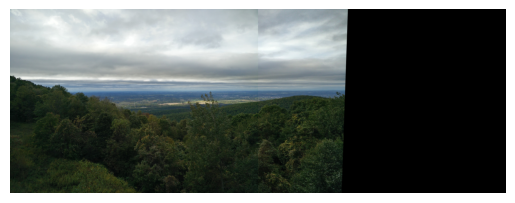

In [28]:
# Load images
# Detect keypoints and extract descriptors
orb = cv2.ORB_create(nfeatures=40000,
    scaleFactor=1.2,
    nlevels=8,
    edgeThreshold=31,
    firstLevel=0,
    WTA_K=2,
    scoreType=cv2.ORB_HARRIS_SCORE,
    patchSize=31,
    fastThreshold=20,)

kp1, des1 = orb.detectAndCompute(img_right, None)
kp2, des2 = orb.detectAndCompute(img_left, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches_cv = bf.match(des1, des2)

# Sort matches by distance
matches_cv = sorted(matches_cv, key=lambda x: x.distance)

# Select the top 10% accurate matches

num_matches = int(len(matches_cv) * 0.5)  # choose 10% of total matches
best_matches = matches_cv[:num_matches]

pts1_best = np.float32([kp1[m.queryIdx].pt for m in best_matches]).reshape(-1, 2)
pts2_best = np.float32([kp2[m.trainIdx].pt for m in best_matches]).reshape(-1, 2)

H2to1, inliers = computeH_ransac_adaptive(pts2_best, pts1_best, 300, 2)

H2to1 = computeH_norm(pts2_best[inliers], pts1_best[inliers])

warped_right_img = cv2.warpPerspective(img_right, H2to1, (img_left.shape[1] + img_right.shape[1], img_left.shape[0]))
warped_right_img[0:img_left.shape[0], 0:img_left.shape[1]] = img_left

# Convert BGR to RGB for matplotlib display
panorama = cv2.cvtColor(warped_right_img, cv2.COLOR_BGR2RGB)

# Display the panorama
plt.imshow(panorama)
plt.axis('off')
plt.show()

In [29]:
img_left = cv2.imread('../data/image2.png')
img_right = cv2.imread('../data/image1.png')

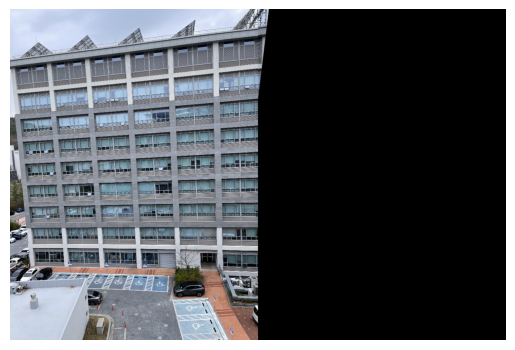

In [30]:
# Load images
# Detect keypoints and extract descriptors
orb = cv2.ORB_create(nfeatures=40000,
    scaleFactor=1.2,
    nlevels=8,
    edgeThreshold=31,
    firstLevel=0,
    WTA_K=2,
    scoreType=cv2.ORB_HARRIS_SCORE,
    patchSize=31,
    fastThreshold=20,)

kp1, des1 = orb.detectAndCompute(img_right, None)
kp2, des2 = orb.detectAndCompute(img_left, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches_cv = bf.match(des1, des2)

# Sort matches by distance
matches_cv = sorted(matches_cv, key=lambda x: x.distance)

# Select the top 10% accurate matches

num_matches = int(len(matches_cv) * 0.5)  # choose 10% of total matches
best_matches = matches_cv[:num_matches]

pts1_best = np.float32([kp1[m.queryIdx].pt for m in best_matches]).reshape(-1, 2)
pts2_best = np.float32([kp2[m.trainIdx].pt for m in best_matches]).reshape(-1, 2)

H2to1, inliers = computeH_ransac_adaptive(pts2_best, pts1_best, 300, 2)

H2to1 = computeH_norm(pts2_best[inliers], pts1_best[inliers])

warped_right_img = cv2.warpPerspective(img_right, H2to1, (img_left.shape[1] + img_right.shape[1], img_left.shape[0]))
warped_right_img[0:img_left.shape[0], 0:img_left.shape[1]] = img_left

# Convert BGR to RGB for matplotlib display
panorama = cv2.cvtColor(warped_right_img, cv2.COLOR_BGR2RGB)

# Display the panorama
plt.imshow(panorama)
plt.axis('off')
plt.show()